In [21]:
# For compatibility between Python 2 and Python 3
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

# To Plot matplotlib figures inline on the notebook
%matplotlib inline
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [33]:
data = pd.read_csv('turnstile_180407.txt')


# Field Description
http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt
C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS

```
C/A      = Control Area (A002)
UNIT     = Remote Unit for a station (R051)
SCP      = Subunit Channel Position represents an specific address for a device (02-00-00)
STATION  = Represents the station name the device is located at
LINENAME = Represents all train lines that can be boarded at this station
           Normally lines are represented by one character.  LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.
DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND   
DATE     = Represents the date (MM-DD-YY)
TIME     = Represents the time (hh:mm:ss) for a scheduled audit event
DESc     = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
           1. Audits may occur more that 4 hours due to planning, or troubleshooting activities. 
           2. Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered. 
ENTRIES  = The comulative entry register value for a device
EXIST    = The cumulative exit register value for a device
```


In [35]:
data=data.head(100)
data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2224050
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2224053
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2224053
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2224055
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2224055
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,20:00:00,REGULAR,6566470,2224055
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,00:00:00,REGULAR,6566470,2224055
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,04:00:00,REGULAR,6566470,2224055
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,08:00:00,REGULAR,6566470,2224055
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/01/2018,12:00:00,REGULAR,6566470,2224055


# Challenge 1
1. Open up a new IPython notebook
2. Download a few MTA turnstile data files
3. Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like

```
{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'], ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'], ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'], ... ] }
```

In [30]:
result = {}
for index, d in data.iterrows():
    #print(d['C/A'], d['UNIT'], d['SCP'], d['STATION'])
    key = (d['C/A'], d['UNIT'], d['SCP'], d['STATION'])
    if key in result:
        result[key].append(list(d[4:]))
    else:
        result[key]=[list(d[4:])]
print(result.keys())

dict_keys([('A002', 'R051', '02-00-00', '59 ST'), ('A002', 'R051', '02-00-01', '59 ST'), ('A002', 'R051', '02-03-00', '59 ST')])


In [31]:
print(result)

{('A002', 'R051', '02-00-00', '59 ST'): [['NQR456W', 'BMT', '03/31/2018', '00:00:00', 'REGULAR', 6566463, 2224050], ['NQR456W', 'BMT', '03/31/2018', '04:00:00', 'REGULAR', 6566470, 2224053], ['NQR456W', 'BMT', '03/31/2018', '08:00:00', 'REGULAR', 6566470, 2224053], ['NQR456W', 'BMT', '03/31/2018', '12:00:00', 'REGULAR', 6566470, 2224055], ['NQR456W', 'BMT', '03/31/2018', '16:00:00', 'REGULAR', 6566470, 2224055], ['NQR456W', 'BMT', '03/31/2018', '20:00:00', 'REGULAR', 6566470, 2224055], ['NQR456W', 'BMT', '04/01/2018', '00:00:00', 'REGULAR', 6566470, 2224055], ['NQR456W', 'BMT', '04/01/2018', '04:00:00', 'REGULAR', 6566470, 2224055], ['NQR456W', 'BMT', '04/01/2018', '08:00:00', 'REGULAR', 6566470, 2224055], ['NQR456W', 'BMT', '04/01/2018', '12:00:00', 'REGULAR', 6566470, 2224055], ['NQR456W', 'BMT', '04/01/2018', '16:00:00', 'REGULAR', 6566470, 2224055], ['NQR456W', 'BMT', '04/01/2018', '20:00:00', 'REGULAR', 6566470, 2224055], ['NQR456W', 'BMT', '04/02/2018', '00:00:00', 'REGULAR', 656

# Challenge 2
Let's turn this into a time series.
For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the dateutil module to convert it into a datetime object. For an example check this StackOverflow question.

Your new dict should look something like

{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ [datetime.datetime(2013, 3, 2, 3, 0), 3788], [datetime.datetime(2013, 3, 2, 7, 0), 2585], [datetime.datetime(2013, 3, 2, 12, 0), 10653], [datetime.datetime(2013, 3, 2, 17, 0), 11016], [datetime.datetime(2013, 3, 2, 23, 0), 10666], [datetime.datetime(2013, 3, 3, 3, 0), 10814], [datetime.datetime(2013, 3, 3, 7, 0), 10229], ... ], .... }



In [50]:
import dateutil.parser
#dateutil.parser.parse("01-02-2013")

In [51]:
result2 = {}
for index, d in data.iterrows():
    key = (d['C/A'], d['UNIT'], d['SCP'], d['STATION'])
    dateCurrent = dateutil.parser.parse(d.DATE +' '+d.TIME)
    currRow=[dateCurrent, d.ENTRIES]
    if key in result2:
        result2[key].append(list(currRow))
    else:
        result2[key]=[list(currRow)]
print(result2)

{('A002', 'R051', '02-00-00', '59 ST'): [[datetime.datetime(2018, 3, 31, 0, 0), 6566463], [datetime.datetime(2018, 3, 31, 4, 0), 6566470], [datetime.datetime(2018, 3, 31, 8, 0), 6566470], [datetime.datetime(2018, 3, 31, 12, 0), 6566470], [datetime.datetime(2018, 3, 31, 16, 0), 6566470], [datetime.datetime(2018, 3, 31, 20, 0), 6566470], [datetime.datetime(2018, 4, 1, 0, 0), 6566470], [datetime.datetime(2018, 4, 1, 4, 0), 6566470], [datetime.datetime(2018, 4, 1, 8, 0), 6566470], [datetime.datetime(2018, 4, 1, 12, 0), 6566470], [datetime.datetime(2018, 4, 1, 16, 0), 6566470], [datetime.datetime(2018, 4, 1, 20, 0), 6566470], [datetime.datetime(2018, 4, 2, 0, 0), 6566470], [datetime.datetime(2018, 4, 2, 4, 0), 6566470], [datetime.datetime(2018, 4, 2, 8, 0), 6566495], [datetime.datetime(2018, 4, 2, 12, 0), 6566629], [datetime.datetime(2018, 4, 2, 16, 0), 6566839], [datetime.datetime(2018, 4, 2, 20, 0), 6567469], [datetime.datetime(2018, 4, 3, 0, 0), 6567630], [datetime.datetime(2018, 4, 3, 4

# Challenge 3
These counts are for every n hours. (What is n?) We want total daily entries.
Now make it that we again have the same keys, but now we have a single value for a single day, which is the total number of passengers that entered through this turnstile on this day.


# Challenge 4

We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the
notebook. To plot the time series, import matplotlib with

    import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the
turnstile and turn it into two lists:
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)


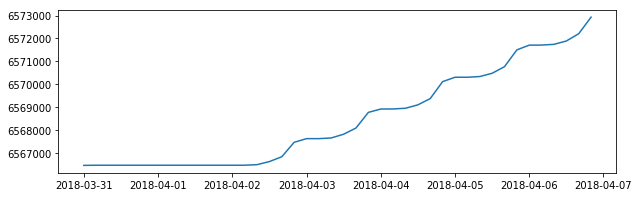

In [10]:
turnstile = list(result2.keys())[0]
dates, counts = zip(*result2[turnstile])
plt.figure(figsize=(10,3))
plt.plot(dates, counts);

# Challenge 5

- So far we've been operating on a single turnstile level, let's
  combine turnstiles in the same ControlArea/Unit/Station combo. There
  are some ControlArea/Unit/Station groups that have a single
  turnstile, but most have multiple turnstilea-- same value for the
  C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each
ControlArea/UNIT/STATION combo, for each day, add the counts from each
turnstile belonging to that combo.


# Challenge 6

Similarly, combine everything in each station, and come up with a time
series of `[(date1, count1),(date2,count2),...]` type of time series
for each STATION, by adding up all the turnstiles in a station.


# Challenge 7

Plot the time series for a station.


# Challenge 8

- Make one list of counts for **one** week for one station. Monday's
count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another
week.
`plt.plot(week_count_list)` for every `week_count_list` you created
this way. You should get a rainbow plot of weekly commute numbers on
top of each other.


# Challenge 9

- Over multiple weeks, sum total ridership for each station and sort
  them, so you can find out the stations with the highest traffic
  during the time you investigate


# Challenge 10

- Make a single list of these total ridership values and plot it with

    plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among
different stations.

This should show you that most stations have a small traffic, and the
histogram bins for large traffic volumes have small bars.

*Additional Hint*:

If you want to see which stations take the meat of the traffic, you
can sort the total ridership counts and make a `plt.bar` graph. For
this, you want to have two lists: the indices of each bar, and the
values. The indices can just be `0,1,2,3,...`, so you can do

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)

In [4]:
data.STATION.unique()

array(['59 ST'], dtype=object)

In [5]:
data.STATION.value_counts().keys()

Index(['59 ST'], dtype='object')

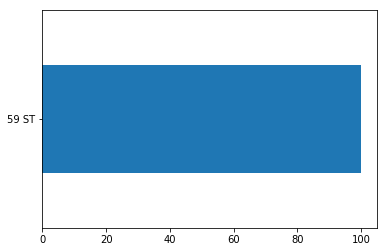

In [6]:
data.STATION.value_counts().plot(kind='barh')


In [7]:
stops = pd.read_csv('data/stops.txt')
stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station
0,101,NaN,Van Cortlandt Park - 242 St,NaN,40.889248,-73.898583,NaN,NaN,1,NaN
1,101N,NaN,Van Cortlandt Park - 242 St,NaN,40.889248,-73.898583,NaN,NaN,0,101
2,101S,NaN,Van Cortlandt Park - 242 St,NaN,40.889248,-73.898583,NaN,NaN,0,101
3,103,NaN,238 St,NaN,40.884667,-73.900870,NaN,NaN,1,NaN
4,103N,NaN,238 St,NaN,40.884667,-73.900870,NaN,NaN,0,103


In [8]:
trips = pd.read_csv('data/trips.txt')
trips.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id
0,GS,A20171105SAT,A20171105SAT_036000_GS.N01R,TIMES SQ - 42 ST,0,NaN,GS.N01R
1,GS,A20171105SAT,A20171105SAT_036400_GS.S01R,GRAND CENTRAL - 42 ST,1,NaN,GS.S01R
2,GS,A20171105SAT,A20171105SAT_037000_GS.N01R,TIMES SQ - 42 ST,0,NaN,GS.N01R
3,GS,A20171105SAT,A20171105SAT_037400_GS.S01R,GRAND CENTRAL - 42 ST,1,NaN,GS.S01R
4,GS,A20171105SAT,A20171105SAT_038000_GS.N01R,TIMES SQ - 42 ST,0,NaN,GS.N01R


In [9]:
routes = pd.read_csv('data/routes.txt')
routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,1,MTA NYCT,1,Broadway - 7 Avenue Local,Trains operate between 242 St in the Bronx and...,1,http://web.mta.info/nyct/service/pdf/t1cur.pdf,EE352E,NaN
1,2,MTA NYCT,2,7 Avenue Express,"Trains operate between Wakefield-241 St, Bronx...",1,http://web.mta.info/nyct/service/pdf/t2cur.pdf,EE352E,
2,3,MTA NYCT,3,7 Avenue Express,"Trains operate between 148 St, 7 Av, Manhattan...",1,http://web.mta.info/nyct/service/pdf/t3cur.pdf,EE352E,NaN
3,4,MTA NYCT,4,Lexington Avenue Express,Trains operate daily between Woodlawn/Jerome A...,1,http://web.mta.info/nyct/service/pdf/t4cur.pdf,00933C,NaN
4,5,MTA NYCT,5,Lexington Avenue Express,"Weekdays daytime, most trains operate between ...",1,http://web.mta.info/nyct/service/pdf/t5cur.pdf,00933C,NaN
